<a href="https://colab.research.google.com/github/Mamta126/The_Sparks_Foundation/blob/main/Task_1_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation Graduate Rotational Internship Program (GRIP)**

## **NAME - MAMTA SHARMA**

## **TASK - 1**
## **Prediction using Machine Learning**

### TOPIC - To predict the percentage of students based on their study hours

### **PROJECT SUMMARY** -

In this project, I used various libraries such as NumPy, Pandas, Matplotlib, Seaborn to analyze and predict the percentage of students based on their study hours. The project involved several steps, including data wrangling, data preprocessing, exploratory data analysis (EDA), plotting graphs and heatmaps, and splitting the data into training and testing sets.

After preprocessing the data, I used the Linear Regression algorithm from the scikit-learn library to build a predictive model. The model was trained using the training data, and then I evaluated its performance by making predictions on the test data.

To further validate the model, I used the slope of the line formula to calculate the slope of the regression line. This helped in understanding the relationship between study hours and percentage of students.

Overall, this project aimed to analyze the relationship between study hours and students' percentages and build a predictive model using linear regression. The model's performance was assessed through various techniques, including visualizations, train-test splitting, and verifying the line's slope

In [ ]:
from IPython.display import Image
Image(url='https://pa1.narvii.com/5844/3cd27426c45d481f5e653f700b17ff4ce038f750_hq.gif', width=700)


## IMPORT LIBRARIES

In [ ]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [ ]:
##imprting Dataset-
path = "/content/student_scores - student_scores.csv"
Data = pd.read_csv(path)
print("Data is successfully imported")
Data

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
### Dataset Rows & Columns count
print(Data.shape)

(25, 2)


In [ ]:
#check details about the data set
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Checking Statistical information
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Preprocessing the dataset**

In [ ]:
# Missing Values/Null Values Count
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* ***As we can see above there are no missing value presents thankfully***

In [ ]:
# Checking Duplicate Values
value=len(Data[Data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


# **Plotting the distribution of scores**

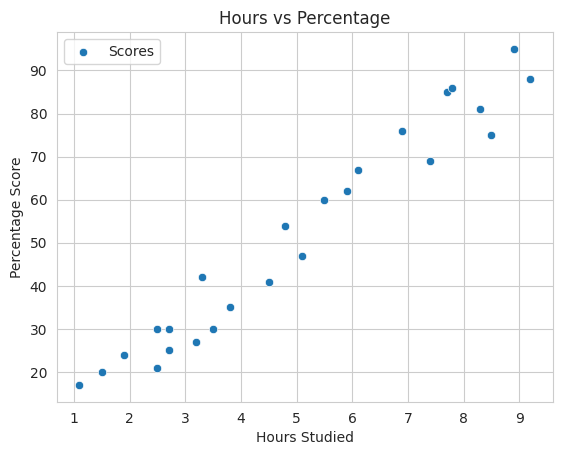

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot(data=Data,x='Hours',y='Scores',label='Scores')
plt.title('Hours vs Percentage',size=12)
plt.xlabel('Hours Studied',size=10)
plt.ylabel('Percentage Score',size=10)
plt.show()

**From the above graph, we can clearly see that there is a positive linear relation between the no. of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
y=Data['Scores']
x=Data.drop(['Scores'],axis=1)

## **Train Test Split**

Train set is for training/building the model & Test set is for checking the accuracy of the model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print("Shape of train data:",x_train.shape[0])
print("Shape of test data:",x_test.shape[0])

Shape of train data: 20
Shape of test data: 5


#**Model Training**

In [ ]:
regressor = LinearRegression()

# fit the model with the training dat
regressor.fit(x_train,y_train)


LinearRegression()

In [ ]:
# Plotting the regression line
line= regressor.coef_*x+regressor.intercept_
line

,Hours
0,26.794801
1,52.562508
2,33.732261
3,86.258740
4,36.705458
5,16.884145
6,93.196200
7,56.526771
8,84.276609
9,28.776933


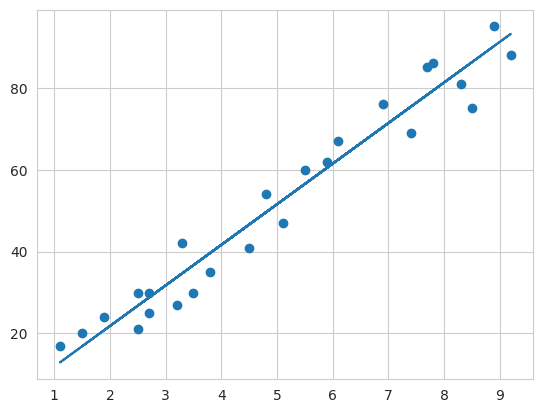

In [ ]:
# Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

## **Making Predictions**

**Now that we have trained our algorithm, it's time to make some predictions.**

In [ ]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores


    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [ ]:
# Comparing - Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
# Computation of the required prediction
hours= [[9.25]]
required_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(required_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539



The student's predicted score when he/she studies for 9.25 hrs/day is around 93.69

## **Verifying the prediction of model**

In [ ]:
regressor.coef_

array([9.91065648])

In [ ]:
regressor.intercept_

2.018160041434662

In [ ]:
# Checking with the Slope of a line formula
# y= m * x + b

y=9.91065648 * 9.25 + 2.018160041434662
y

93.69173248143466

## **Now we can see that predicted value is 93.69 & we also verify that predicted value as y=m*X+b, and got the same value**

## **Evaluating the model**

In [ ]:
from sklearn.metrics import r2_score
print(" R squared scored is: ",r2_score(y_test,y_pred))
metrics.r2_score(y_test,y_pred)##Goodness of fit Test

 R squared scored is:  0.9454906892105354


0.9454906892105354